## K-Means Clustering
@Ram Vempati

### What is Clustering?

Clustering - A typical and well-known type of unsupervised learning. Clustering algorithms try to find natural groupings in data. Similar data points (according to some notion of similarity) are considered in the same group. We call these groups clusters.

Once algorithm is run and groups are determined, any new data can be easily assigned to the correct group

Clsutering in general can be used for any type of grouping. Some examples of use cases are:

* Behavioral segmentation:
    - Segment by purchase history
    - Segment by activities on application, website, or platform
    - Define personas based on interests
    - Create profiles based on activity monitoring
* Inventory categorization:
    - Group inventory by sales activity
    - Group inventory by manufacturing metrics
    - Sorting sensor measurements:
* Detect activity types in motion sensors
    - Group images
    - Separate audio
    - Identify groups in health monitoring
* Detecting bots or anomalies:
    - Separate valid activity groups from bots
    - Group valid activity to clean up outlier detection


### What is K-Means Clustering

K-Means clustering is a simple and widely-used clustering algorithm. Given value of k , it tries to build k clusters from samples in the dataset.

### How does it work?

Below are 4 simple steps
1. Input K and set of points x<sub>1</sub>, x<sub>2</sub>, x<sub>3</sub>.....x<sub>n</sub>
2. Place or start with some K centroids at random locations, c<sub>1</sub>, c<sub>2</sub>, c<sub>3</sub>.....c<sub>k</sub>
3. Repeat below until convergence
    * For each point x<sub>i</sub>
        - find nearest centroid c<sub>j</sub>
        - assign the point x<sub>i</sub> to cluster J
    * For each cluster J = 1....K
        - new centroid c<sub>j</sub> = mean of all points x<sub>i</sub> in that cluster
        - assign to cluster J in previous step
4. Stop when none of the cluster assignments change

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from pprint import pprint
np.random.seed(sum(map(ord, "aesthetics")))
seaborn.set_context('notebook')

### Example - 1

Generate some random samples (blobs) - basically generates random samples X, y with 3 clusters (centers parameter) also making it fairly easy to spot the clusters, note the cluster_std parameter (The standard deviation of the clusters)

(300, 2) (300,)


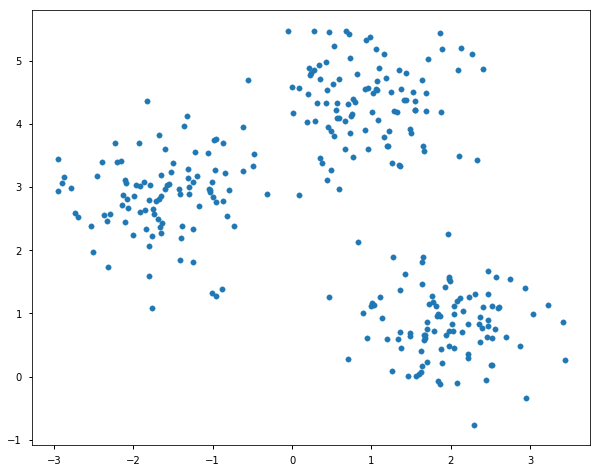

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=3, random_state=0, cluster_std=0.60)
print(X.shape, y.shape)

# y can take values 0,1,2 for 3 clusters but we're going to ignore y for the time being
# Visualizing the blobs as a scatter plot
plt.figure(figsize = (10, 8))
plt.scatter(X[:, 0], X[:, 1], s=30, cmap=plt.cm.Paired);

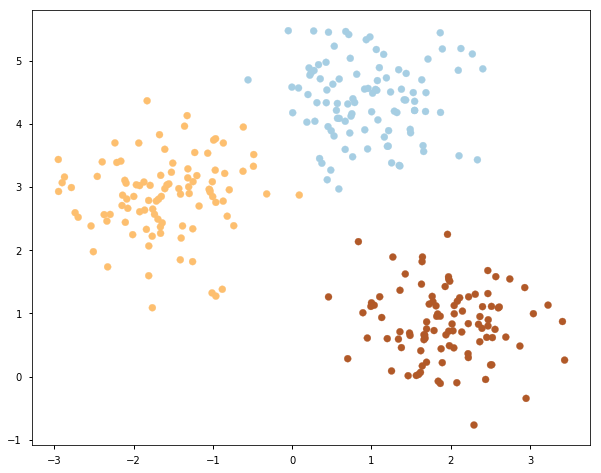

In [3]:
from sklearn.cluster import KMeans

# number of clusters to predict 3
ktest = KMeans(n_clusters=3)

# fitting the model to X 
ktest.fit(X)

# predicting labels (y) and saving to y_pred
y_pred = ktest.predict(X)

# Plotting predicted labels as a scatter
plt.figure(figsize = (10,8))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap=plt.cm.Paired)
plt.show()

#### How about finding 4 clusters instead of 3?

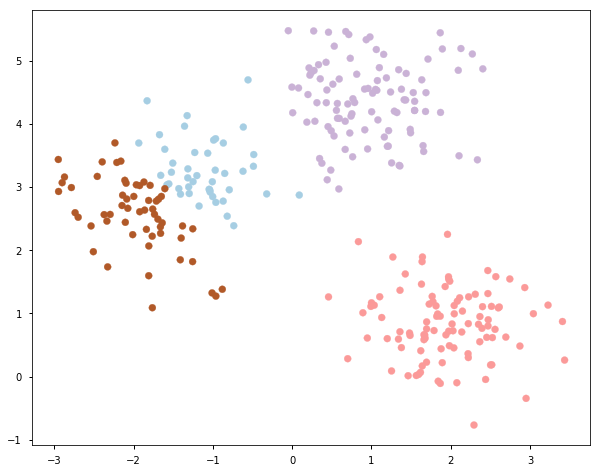

In [4]:
ktest = KMeans(n_clusters=4) 
ktest.fit(X) #fitting the model to X
y_pred = ktest.predict(X) #predicting labels (y) and saving to y_pred

#Plotting predicted labels as a scatter
plt.figure(figsize = (10,8))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap=plt.cm.Paired)
plt.show()

#### Changing maximum iterations to 100 instead of default 300

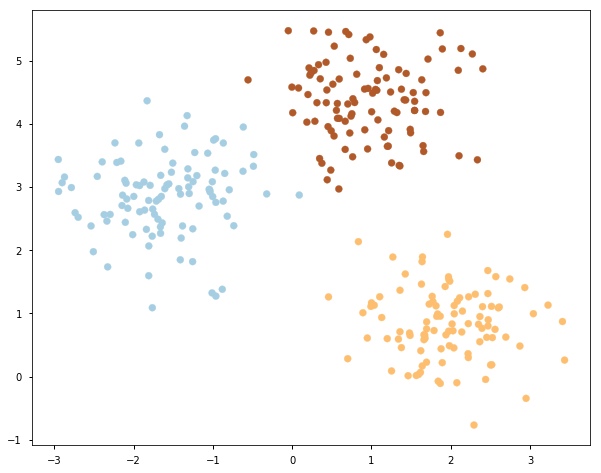

In [5]:
ktest = KMeans(n_clusters=3, max_iter=100) #number of clusters to predict 3
ktest.fit(X) #fitting the model to X
y_pred = ktest.predict(X) #predicting labels (y) and saving to y_pred

#Plotting predicted labels as a scatter
plt.figure(figsize = (10,8))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap=plt.cm.Paired)
plt.show()

#### Change the cluster_std parameter to make the points non separable

(300, 2) (300,)


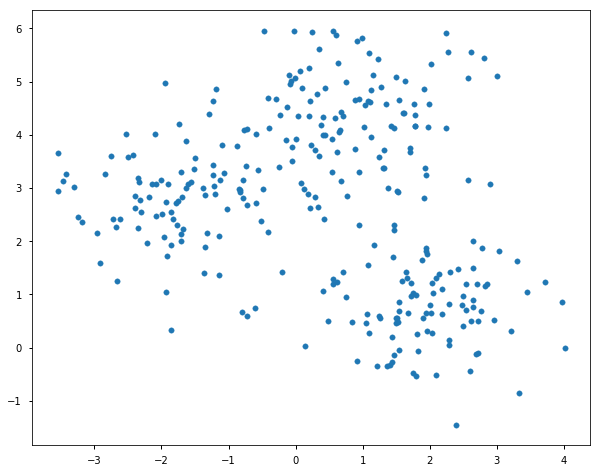

In [6]:
X, y = make_blobs(n_samples=300, centers=3, random_state=0, cluster_std=0.85)
print(X.shape, y.shape) #y can take values 0,1,2 for 3 clusters but we're going to ignore y for the time being

# Visualizing the blobs as a scatter plot
plt.figure(figsize = (10,8))
plt.scatter(X[:, 0], X[:, 1], s=30, cmap=plt.cm.Paired)
plt.show()

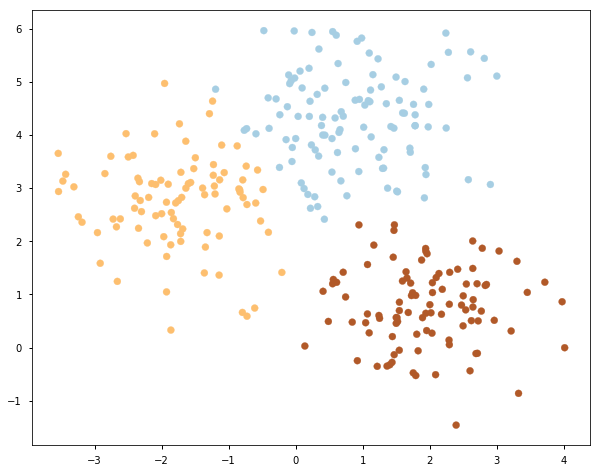

In [7]:
ktest = KMeans(n_clusters=3, max_iter=100) #number of clusters to predict 3 
ktest.fit(X) #fitting the model to X
y_pred = ktest.predict(X) #predicting labels (y) and saving to y_pred

#Plotting predicted labels as a scatter plot
plt.figure(figsize = (10,8))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap=plt.cm.Paired)
plt.show()

Comparison of Cluster Labels with Original

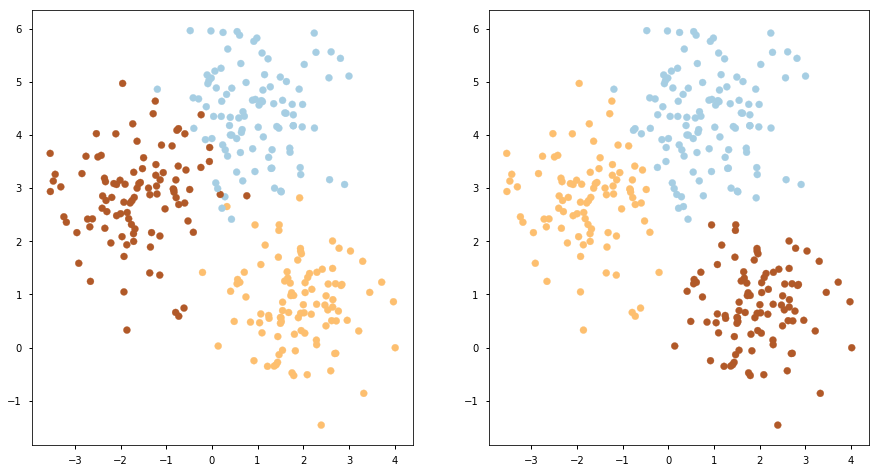

In [8]:
fig, ax = plt.subplots(1,2,figsize=(15,8))
ax[0].scatter(X[:,0], X[:,1], c = y, cmap = plt.cm.Paired)
ax[1].scatter(X[:,0], X[:,1], c = y_pred, cmap = plt.cm.Paired)
plt.show()

In [9]:
from sklearn import metrics

print(metrics.confusion_matrix(y, y_pred))

[[100   0   0]
 [  2   1  97]
 [  9  91   0]]


In [10]:
print(metrics.accuracy_score(y, y_pred))

0.336666666667


### Example - 2

Let us use digits data from scikit-learn for clustering

In [11]:
from sklearn.datasets import load_digits

digits = load_digits()

print(digits.keys())
print(digits.images.shape)

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
(1797, 8, 8)


In [12]:
# Let's ignore targets for the time being and use K-Means to find clusters in these images. 
# We know that there are a total 10 clusters for 0-9 digits
X, y = digits.data, digits.target
k_digits = KMeans(n_clusters=10)
y_pred = k_digits.fit_predict(X)

# Let's check the parameter cluster centers of the estimator
print(k_digits.cluster_centers_.shape)

(10, 64)


Centroids are the center of each of the clusters. In essence, 8x8 images of each of the 10 digits (atleast we expect it to be). Let's find out by visualizing these using scatter.

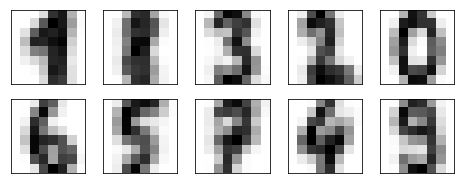

In [13]:
fig = plt.figure(figsize=(8,3))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
    ax.imshow(np.reshape(k_digits.cluster_centers_[i],(8,8)), cmap=plt.cm.binary)

Let's visualize predicted labels and original labels to see if they're close.

Now, X is a 64 dimension dataset. If we need to visualize this in 2D, we'll need to use PCA to reduce #the dimensionality.

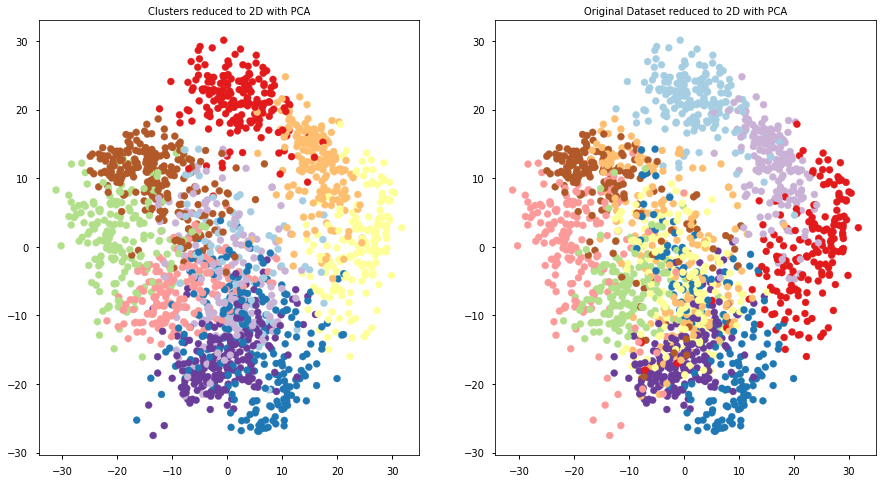

In [14]:
from sklearn.decomposition import PCA
pca = PCA(2).fit(X)
X_proj = pca.transform(X)

fig, ax = plt.subplots(1, 2, figsize=(15,8))
ax[0].scatter(X_proj[:,0], X_proj[:,1], c=y_pred, cmap=plt.cm.Paired)
ax[0].set_title('Clusters reduced to 2D with PCA', fontsize=10)

ax[1].scatter(X_proj[:,0], X_proj[:,1], c=y, cmap=plt.cm.Paired)
ax[1].set_title('Original Dataset reduced to 2D with PCA', fontsize=10)

plt.show()

In [15]:
print(metrics.confusion_matrix(y, y_pred))

[[  0   0   0   0 177   0   0   0   1   0]
 [ 55  99   1  24   0   2   1   0   0   0]
 [  2   8  13 148   1   0   0   3   0   2]
 [  0   7 157   1   0   0   2   7   0   9]
 [  7   4   0   0   0   0   0   7 163   0]
 [  0   0   1   0   0   1 137   0   1  42]
 [  1   2   0   0   1 177   0   0   0   0]
 [  2   2   0   0   0   0   5 170   0   0]
 [  6 102   4   3   0   2   6   3   0  48]
 [ 20   2   7   0   0   0   6   7   0 138]]


In [16]:
print(metrics.accuracy_score(y, y_pred))

0.234835837507


### Comparison of models on other metrics

**Homogenity:** Homogeneity metric of a cluster labeling given a ground truth. A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.

**Completeness:** Completeness metric of a cluster labeling given a ground truth. A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.

**V Measure Score:** The V-measure is the harmonic mean between homogeneity and completeness: 
v = 2 * (homogeneity * completeness) / (homogeneity + completeness)

**Adjusted Rand Score:** The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings. The raw RI score is then “adjusted for chance” into the ARI score using the following scheme:
ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)

**Adjusted Mutual Info Score:** Adjusted Mutual Information (AMI) is an adjustment of the Mutual Information (MI) score to account for chance. It accounts for the fact that the MI is generally higher for two clusterings with a larger number of clusters, regardless of whether there is actually more information shared. For two clusterings U and V, the AMI is given as:
AMI(U, V) = [MI(U, V) - E(MI(U, V))] / [max(H(U), H(V)) - E(MI(U, V))]

**Silhouette Score:** The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

This function returns the mean Silhouette Coefficient over all samples. To obtain the values for each sample, use silhouette_samples.

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [17]:
print(metrics.homogeneity_score(y, y_pred))
print(metrics.completeness_score(y, y_pred))
print(metrics.v_measure_score(y, y_pred))
print(metrics.adjusted_rand_score(y, y_pred))
print(metrics.adjusted_mutual_info_score(y, y_pred))

0.734836028848
0.742485345891
0.738640883943
0.666122732057
0.732181284699
